### Урок 7. ДЗ ###

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

In [52]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

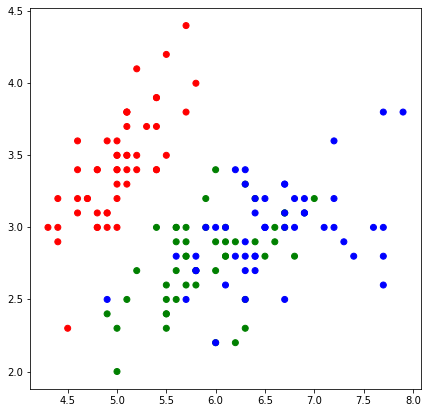

In [58]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [25]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [26]:
{class_item: 0 for class_item in set(y_train)}

{0: 0, 1: 0, 2: 0}

In [69]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            
#             classes[d[1]] += 1


            # РЕШЕНИЕ: добавление веса объекта в зависимости от расстояния
            q = 0.5
            weight = q ** distance

            classes[d[1]] += weight

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [68]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

0.13254223456049338
0.13254223456049338
0.13254223456049338
0.13254223456049338
0.13254223456049338
0.13254223456049338
0.13254223456049338
0.13254223456049338
0.13254223456049338
0.13254223456049338
0.702270164029609
0.702270164029609
0.702270164029609
0.702270164029609
0.702270164029609
0.702270164029609
0.702270164029609
0.702270164029609
0.702270164029609
0.702270164029609
0.5034954012511547
0.5034954012511547
0.5034954012511547
0.5034954012511547
0.5034954012511547
0.5034954012511547
0.5034954012511547
0.5034954012511547
0.5034954012511547
0.5034954012511547
0.73345807328957
0.73345807328957
0.73345807328957
0.73345807328957
0.73345807328957
0.73345807328957
0.73345807328957
0.73345807328957
0.73345807328957
0.73345807328957
0.6281493864789098
0.6281493864789098
0.6281493864789098
0.6281493864789098
0.6281493864789098
0.6281493864789098
0.6281493864789098
0.6281493864789098
0.6281493864789098
0.6281493864789098
0.5898510889130057
0.5898510889130057
0.5898510889130057
0.58985108891

In [10]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

(2352, 2)


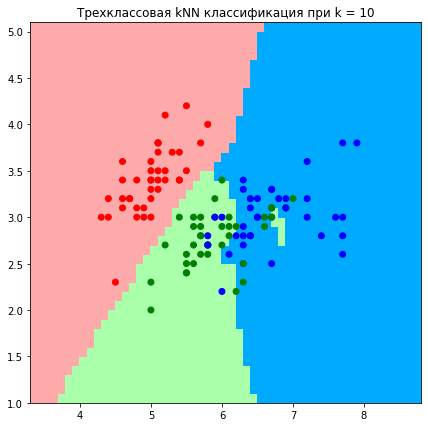

CPU times: user 2.88 s, sys: 44.9 ms, total: 2.93 s
Wall time: 3.03 s


In [60]:
%%time
get_graph(X_train, y_train, k)